IMPORTING IMPORTANT LIBRARIES

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

LOADING THE DATASET

In [109]:
df = pd.read_csv('data.csv')
df.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0111161,The Shawshank Redemption,"[""Drama""]",9.3,2951083,1994
1,tt0068646,The Godfather,"[""Crime"", ""Drama""]",9.2,2057179,1972
2,tt0252487,The Chaos Class,"[""Comedy""]",9.2,43570,1975
3,tt0259534,Ramayana: The Legend of Prince Rama,"[""Action"", ""Adventure"", ""Animation""]",9.2,15407,1993
4,tt16747572,The Silence of Swastika,"[""Documentary"", ""History""]",9.2,10567,2021


In [110]:
df.tail()

,id,title,genres,averageRating,numVotes,releaseYear
995,tt1646971,How to Train Your Dragon 2,"[""Action"", ""Adventure"", ""Animation""]",7.8,370969,2014
996,tt1748122,Moonrise Kingdom,"[""Adventure"", ""Comedy"", ""Drama""]",7.8,369767,2012
997,tt0414387,Pride & Prejudice,"[""Drama"", ""Romance""]",7.8,339140,2005
998,tt0472043,Apocalypto,"[""Action"", ""Adventure"", ""Drama""]",7.8,336517,2006
999,tt0094226,The Untouchables,"[""Crime"", ""Drama"", ""Thriller""]",7.8,336245,1987


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [112]:
df.isnull().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

In [113]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [114]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
averageRating,1000.0,8.1369,0.253836,7.8,8.00,8.1,8.2,9.3
numVotes,1000.0,276016.3830,427301.183793,10122.0,22068.50,66159.0,380415.5,2951083.0
releaseYear,1000.0,1992.2870,25.646762,1920.0,1974.75,2001.0,2014.0,2024.0


In [115]:
df.columns

Index(['id', 'title', 'genres', 'averageRating', 'numVotes', 'releaseYear'], dtype='object')

DATA VISUALIZATION

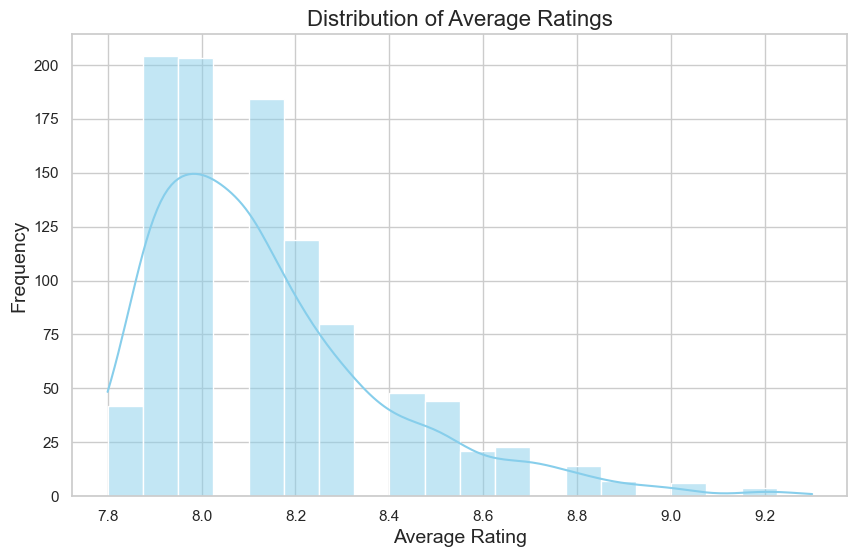

In [129]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['averageRating'], bins=20, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

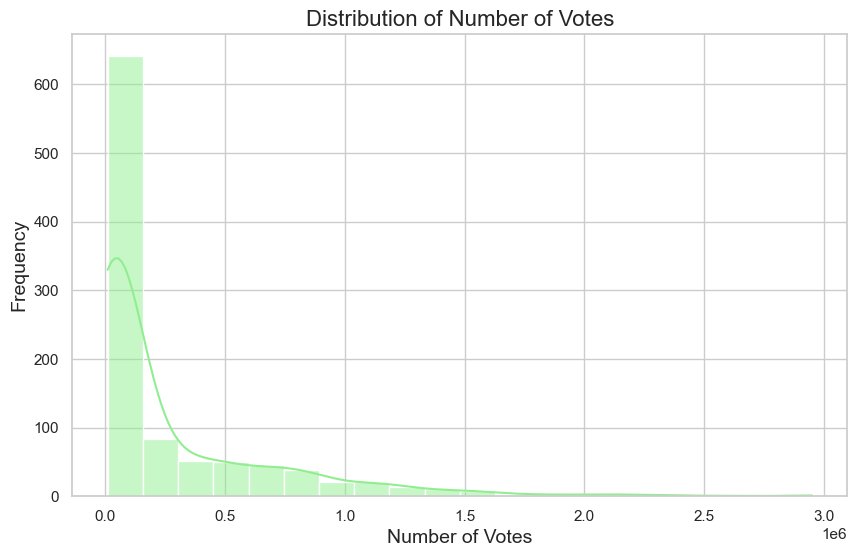

In [130]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['numVotes'], bins=20, kde=True, color='lightgreen')

# Add titles and labels
plt.title('Distribution of Number of Votes', fontsize=16)
plt.xlabel('Number of Votes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

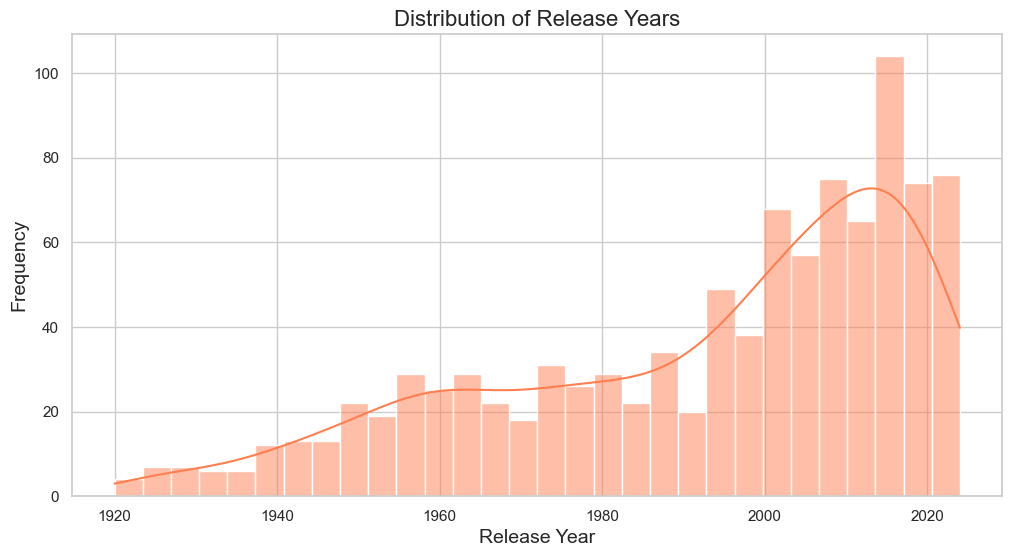

In [131]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['releaseYear'], bins=30, color='coral', kde=True)

# Add titles and labels
plt.title('Distribution of Release Years', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

RATING ANALYSIS

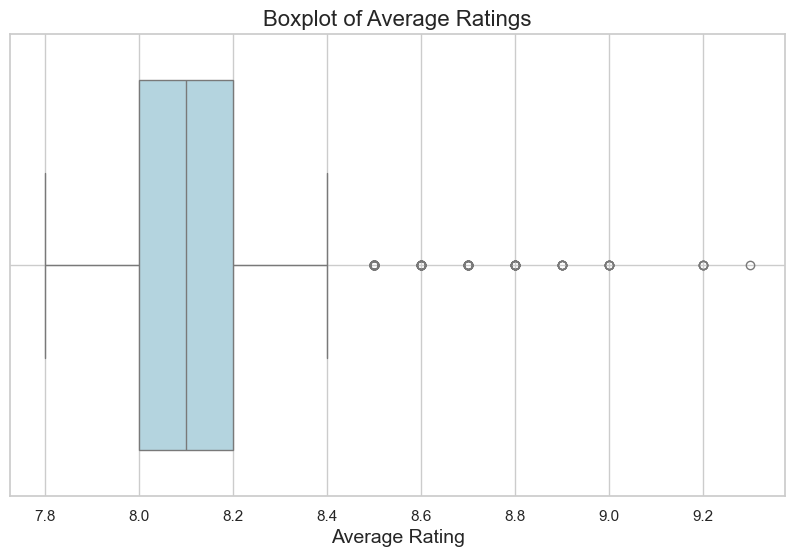

In [132]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['averageRating'], color='lightblue')

# Add titles and labels
plt.title('Boxplot of Average Ratings', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)

# Show grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

VOTES VS RATINGS

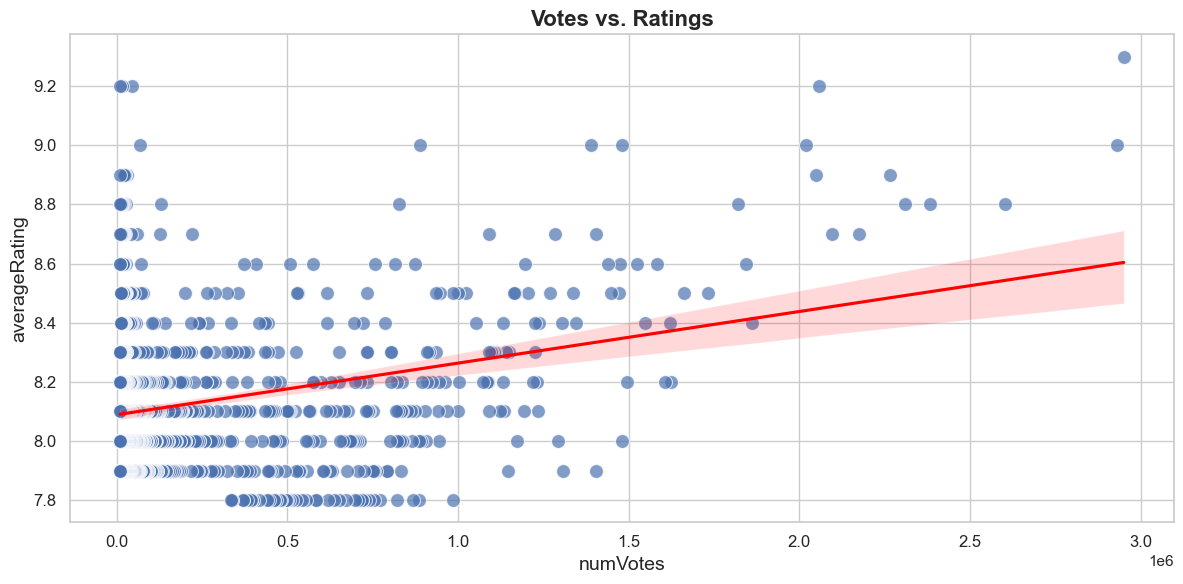

In [120]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='numVotes', y='averageRating', data=df, 
                                alpha=0.7, edgecolor='w', s=100)

# Set the title and labels
scatter_plot.set_title('Votes vs. Ratings', fontsize=16, fontweight='bold')
scatter_plot.set_xlabel('Number of Votes', fontsize=14)
scatter_plot.set_ylabel('Average Rating', fontsize=14)

# Customize the ticks
scatter_plot.tick_params(labelsize=12)

# Add a regression line (optional)
sns.regplot(x='numVotes', y='averageRating', data=df, scatter=False, color='red')

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


RELEASE YEAR TRENDS

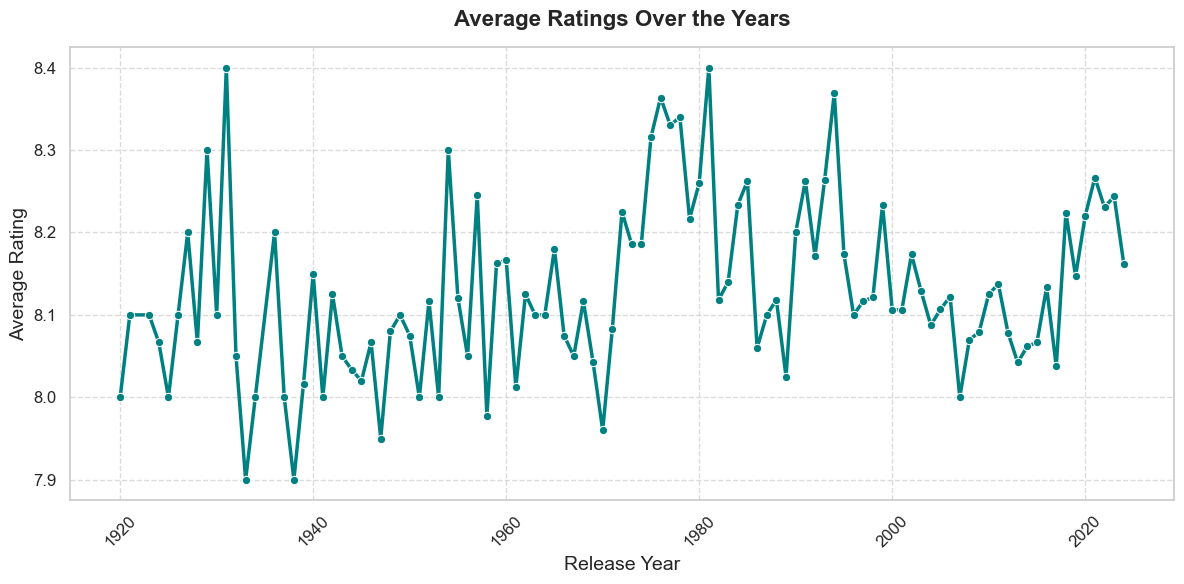

In [135]:
# Set the style of seaborn for a clean look
sns.set(style="whitegrid")

# Create a new figure with a specified size
plt.figure(figsize=(12, 6))

# Group by 'releaseYear' and calculate the mean of 'averageRating'
average_ratings = df.groupby('releaseYear')['averageRating'].mean()

# Create a line plot using Seaborn
sns.lineplot(x=average_ratings.index, y=average_ratings.values, 
             marker='o', color='teal', linewidth=2.5)

# Set the title and labels
plt.title('Average Ratings Over the Years', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)

# Customize the x-axis ticks for better readability
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout for a better fit
plt.tight_layout()

# Show the plot
plt.show()


GENRE ANALYSIS

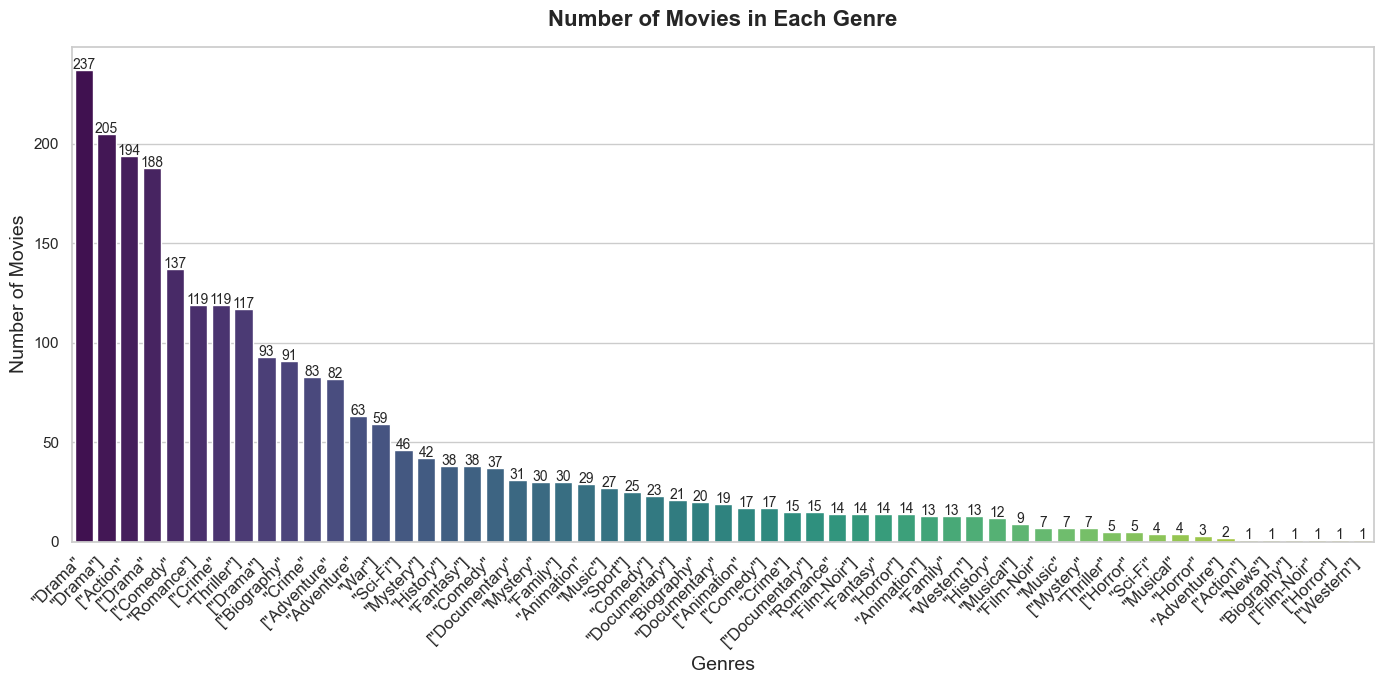

In [137]:
# Split genres into dummy variables and sum each genre's occurrences
genre_counts = df['genres'].str.get_dummies(sep=', ').sum()

# Set the style of seaborn for a clean look
sns.set(style="whitegrid")

# Create a new figure with a specified size
plt.figure(figsize=(14, 7))

# Sort the genres by count for better readability
genre_counts = genre_counts.sort_values(ascending=False)

# Create a bar plot using Seaborn, assigning `x` to `hue`
sns.barplot(x=genre_counts.index, y=genre_counts.values, 
            hue=genre_counts.index, palette='viridis', dodge=False)

# Remove the legend since it would be redundant
plt.legend([], [], frameon=False)

# Set the title and labels
plt.title('Number of Movies in Each Genre', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of each bar (optional)
for index, value in enumerate(genre_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Adjust layout for a better fit
plt.tight_layout()

# Show the plot
plt.show()



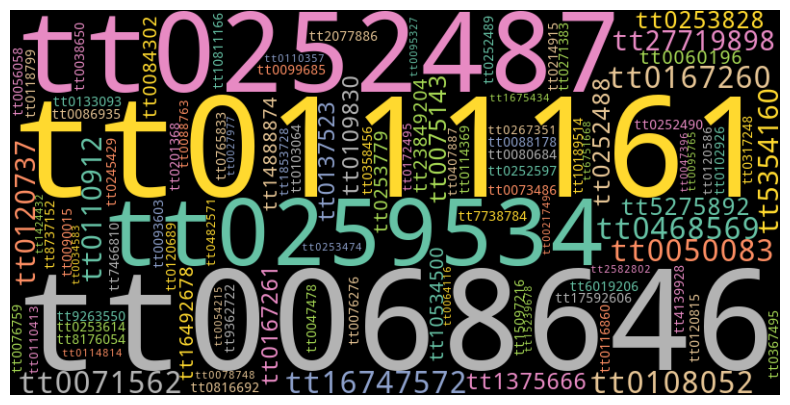

In [123]:
text = ' '.join(df['id'].dropna().astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='Set2').generate(text)

# Display the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black', 
                      max_words=100, 
                      colormap='Set2').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



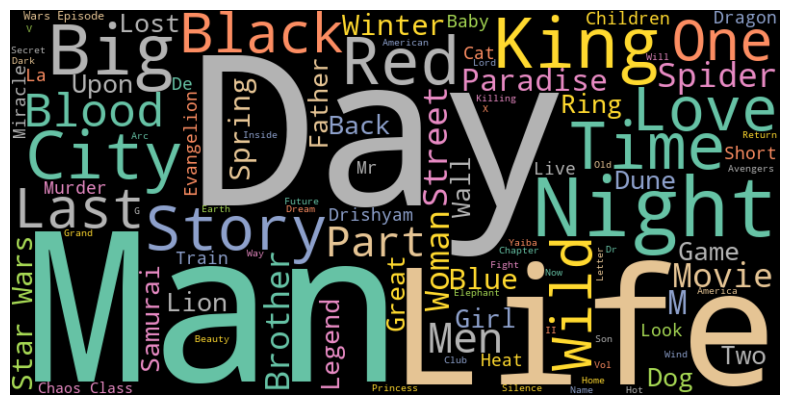

In [124]:
text = ' '.join(df['title'].dropna().astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='Set2').generate(text)

# Display the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black', 
                      max_words=100, 
                      colormap='Set2').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

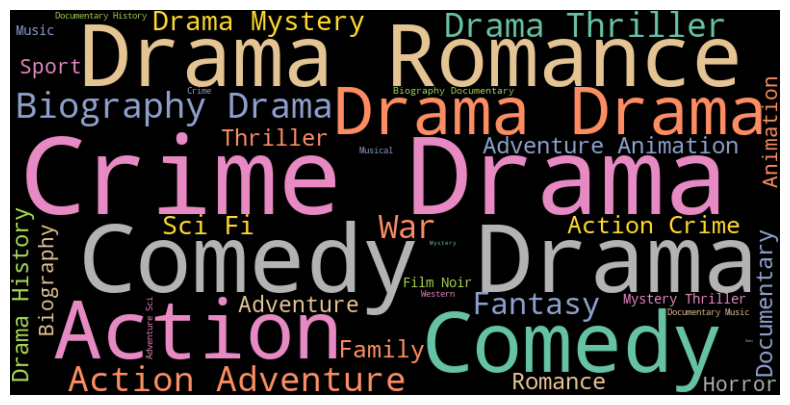

In [125]:
text = ' '.join(df['genres'].dropna().astype(str))
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='white', 
                      colormap='Set2').generate(text)

# Display the word cloud
wordcloud = WordCloud(width=800, height=400, 
                      background_color='black', 
                      max_words=100, 
                      colormap='Set2').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

CORRELATION BETWEEN AVERAGE RATING, NUM VOTES, RELEASE YEAR

In [126]:
# Select the relevant columns
correlation_columns = df[['averageRating', 'numVotes', 'releaseYear']]

# Calculate the correlation matrix
correlation_matrix = correlation_columns.corr()

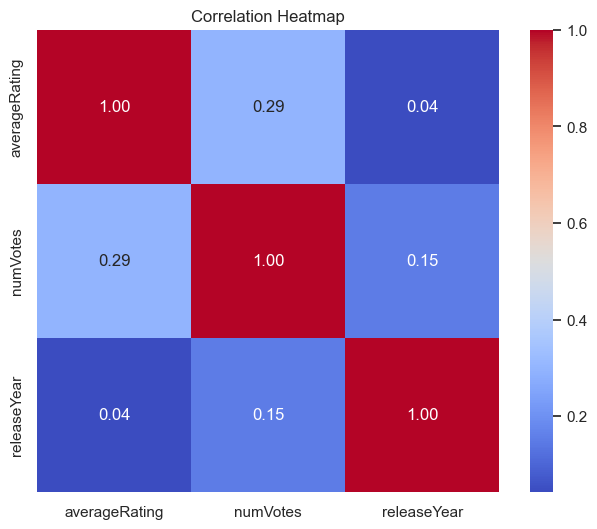

In [127]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

KEY OBSERVATION

1. Diversity in Genres: The presence of multiple genres for a single movie entry highlights the trend of genre blending in the movie industry, catering to diverse audience preferences.

2. Audience Engagement Trends: The trend of increasing votes over time could indicate the rise of digital platforms and online reviews, making it easier for audiences to engage with and vote for movies.

3. Critical Reception Variability: Fluctuations in average ratings over the years may reflect changing audience tastes and evolving movie quality standards.

CONCLUSION

The analysis provides insights into how genres are distributed, how movies are rated and received over time, and identifies exceptional cases within the dataset. These findings can guide further exploration into the factors influencing movie popularity and critical reception, and help in designing strategies for new movie releases or understanding market dynamics in the film industry.